In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_engine as fe

df_train = pd.read_csv("ALUMNOS-trainData.csv", low_memory=False).set_index("id")
df_test = pd.read_csv("ALUMNOS-evalData.csv", low_memory=False).set_index("id")
print(df_train.shape)
df_train.sample(5)

(999890, 21)


,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
id,,,,,,,,,,,,,,,,,,,,,
1214729,2011-09-25,8985,PMC,SCL,917,1.0,0,13,2,0,...,24,16,0,66,17,14,12:08:00,218.0,16137.5,97
1315195,2011-12-12,8464,AKL,SYD,2160,8.0,0,29,1,1,...,7,0,0,0,102,2,07:35:00,208.0,25387.8,104
689129,2010-07-23,7033,LIM,IQT,1007,8.0,0,13,2,0,...,14,0,0,0,0,95,06:20:00,144.0,8114.3,95
1218876,2011-09-28,5952,NAT,BSB,1771,8.0,0,89,11,27,...,14,0,1,118,0,87,15:20:00,174.0,13532.5,205
513760,2010-02-20,6162,CGH,FLN,488,1.0,0,99,1,3,...,13,0,0,63,9,126,08:25:00,144.0,6581.6,198


In [34]:
# nsbin = noshow binary > 3
df_train["nsbin"] = df_train.noshow.transform(lambda x: 1 if x > 3 else 0)
df_train.sample(5)

,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings,nsbin
id,,,,,,,,,,,,,,,,,,,,,
183788,2009-05-29,6211,CLO,BOG,297,7.0,0,147,0,2,...,0,1,65,23,190,10:05:00,174.0,4156.2,278,1
896806,2011-01-10,7225,CUZ,LIM,586,1.0,0,5,13,0,...,0,0,23,2,26,13:20:00,120.0,6781.7,51,0
227406,2009-07-04,8332,MDZ,SCL,196,22.0,0,118,15,0,...,0,1,0,108,63,17:19:00,168.0,13641.2,171,1
277127,2009-08-11,6189,GIG,VIX,415,6.0,0,68,6,0,...,0,0,25,10,123,09:40:00,174.0,6328.0,158,1
781724,2010-10-06,7202,LIM,CUZ,586,13.0,0,14,0,1,...,0,0,20,0,93,16:00:00,174.0,5951.2,113,1


In [91]:
df_train.rename(columns={"fligth_number": "flight_number"}, inplace=True)
df_train.sample(5)

,date,flight_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings,nsbin
id,,,,,,,,,,,,,,,,,,,,,
430325,2009-12-12,7125,AQP,LIM,768,11.0,0,99,1,11,...,0,0,7,14,217,16:45:00,174.0,10168.5,238,1
1054586,2011-05-21,5478,CGH,SJP,421,3.0,0,97,0,7,...,0,0,53,0,70,07:55:00,174.0,5740.1,123,0
739915,2010-09-01,5616,CGB,BSB,877,7.0,0,63,4,21,...,0,0,54,0,93,20:33:00,174.0,13022.5,147,1
19827,2009-01-16,4918,BRC,AEP,1336,3.0,0,120,2,14,...,0,0,1,5,206,16:25:00,168.0,21669.0,212,0
125052,2009-04-10,6673,LIM,PUJ,3532,1.0,0,99,0,0,...,7,0,0,103,105,13:05:00,144.0,16440.2,208,0


## Vector Objetivo

In [84]:
# resumen de noshow
df_train.noshow.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

count    999890.000000
mean          6.015652
std           5.112598
min           0.000000
1%            0.000000
5%            0.000000
10%           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
90%          12.000000
95%          15.000000
99%          23.000000
99.9%        44.000000
max         271.000000
Name: noshow, dtype: float64

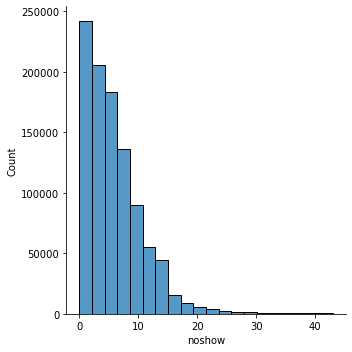

<AxesSubplot:xlabel='nsbin', ylabel='count'>

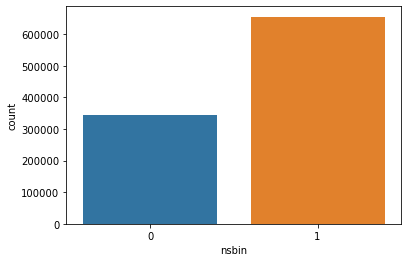

In [57]:
# plot de noshow sin outliers (quitando outliers sobre 99.9 percentil)
sns.displot(df_train.noshow[df_train.noshow < df_train.noshow.quantile(0.999)], kde=False, bins=20)
plt.show()

# plot de nsbin (noshow binario)
sns.countplot(x="nsbin", data=df_train)




## EDA

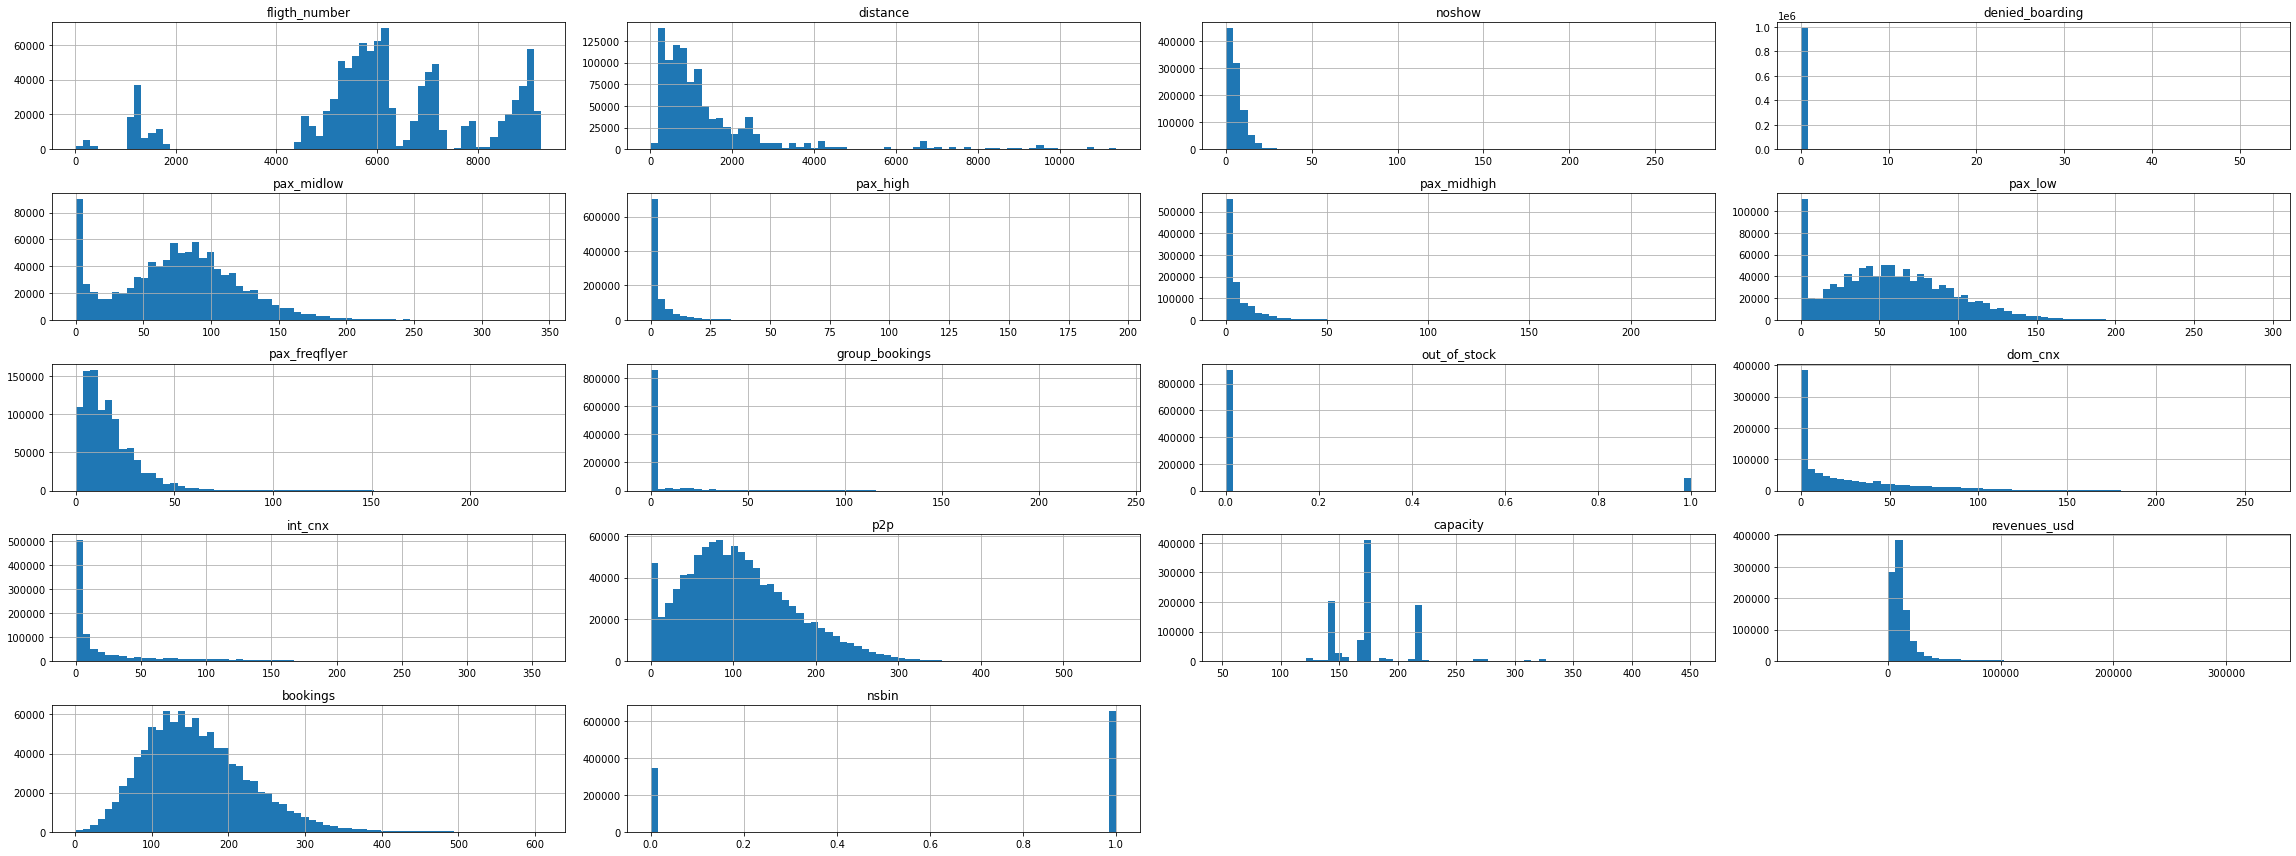

In [58]:
# distribuciones de los datos numéricos
df_train.select_dtypes(np.number).hist(figsize=(32, 12), bins=64)
plt.tight_layout()


## Valores Ausentes

In [59]:
# conteo de valores austentes
df_train.isnull().sum().sort_values(ascending=False)

departure_time     1418
date                  0
fligth_number         0
bookings              0
revenues_usd          0
capacity              0
p2p                   0
int_cnx               0
dom_cnx               0
out_of_stock          0
group_bookings        0
pax_freqflyer         0
pax_low               0
pax_midhigh           0
pax_high              0
pax_midlow            0
denied_boarding       0
noshow                0
distance              0
destination           0
origin                0
nsbin                 0
dtype: int64

Solo existen 1418 valores ausentes en departure_time

In [60]:
# datos no numéricos
df_train.select_dtypes(exclude=np.number).columns

Index(['date', 'origin', 'destination', 'departure_time'], dtype='object')

In [102]:
# flight_number como categórico
df_train["flight_number"] = df_train.flight_number.astype("category")
# departure_time como numérico (en minutos)
df_train["dt_numeric"] = pd.to_datetime(df_train.departure_time, format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(df_train.departure_time, format="%H:%M:%S").dt.minute

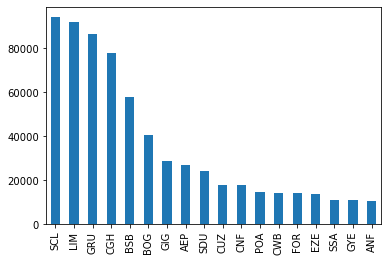

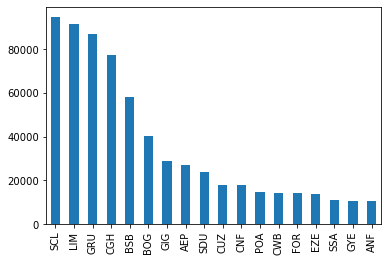

In [75]:
#plot origen y destino (sólo sobre el 1% del total)
df_train.origin.value_counts()[df_train.origin.value_counts() > df_train.shape[0] * 0.01].plot(kind = "bar")
plt.show()

df_train.destination.value_counts()[df_train.destination.value_counts() > df_train.shape[0] * 0.01].plot(kind = "bar")
plt.show()


<AxesSubplot:>

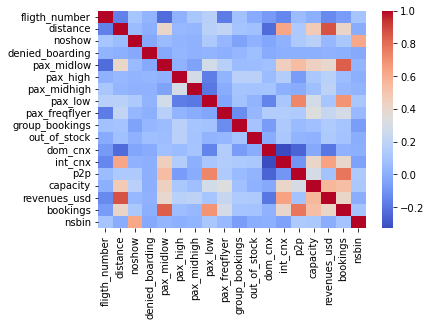

In [82]:
# heatmap de correlaciones
sns.heatmap(df_train.corr(), cmap="coolwarm")

In [ ]:
# datos numéricos
num = pd.DataFrame()
num = df_train.select_dtypes(np.number)

# datos categóricos
cat = pd.DataFrame()
cat["origin"] = df_train.origin
cat["destination"] = df_train.destination
cat["flight_number"] = df_train.flight_number

In [137]:
for var in cat: 
    print(cat[var].value_counts()/float(len(cat)))

SCL    0.094136
LIM    0.091913
GRU    0.086639
CGH    0.077606
BSB    0.058022
         ...   
LAS    0.000038
PIO    0.000031
MPN    0.000031
TLV    0.000010
UNA    0.000001
Name: origin, Length: 155, dtype: float64
SCL    0.094638
LIM    0.091625
GRU    0.086724
CGH    0.077442
BSB    0.058251
         ...   
TLV    0.000009
QRO    0.000002
TPA    0.000001
FLL    0.000001
GDL    0.000001
Name: destination, Length: 159, dtype: float64
8985    0.001731
8980    0.001700
8464    0.001690
8465    0.001682
8735    0.001682
          ...   
8112    0.000001
8106    0.000001
8093    0.000001
8091    0.000001
10      0.000001
Name: flight_number, Length: 4026, dtype: float64


## Feature Engineering

In [162]:
## dataframes para eventuales datos de ingeniería de atributos

# extracción de datos respecto al booking según tipo de pago
ratios = pd.DataFrame()
ratios["ratio_midlow"] = df_train.pax_midlow / df_train.bookings
ratios["ratio_high"] = df_train.pax_high / df_train.bookings
ratios["ratio_midhigh"] = df_train.pax_midhigh / df_train.bookings
ratios["ratio_low"] = df_train.pax_low / df_train.bookings
ratios["ratio_freqflyer"] = df_train.pax_freqflyer / df_train.bookings


# extracción de datos relativos a la fecha
dates = pd.DataFrame()
dates["year"] = df_train.date.transform(lambda x: int(x.split("-")[0]))
dates["month"] = df_train.date.transform(lambda x: int(x.split("-")[1]))
dates["day"] = df_train.date.transform(lambda x: int(x.split("-")[2]))
dates["weekday"] = df_train.date.transform(lambda x: pd.to_datetime(x).weekday())
# hora numérica
dates["dtime_numeric"] = df_train.dt_numeric


# codificación de datos cíclicos
cycles = pd.DataFrame()
cycles["departure_time_sin"] = np.sin(2 * np.pi * dates.dtime_numeric / 1440)
cycles["departure_time_cos"] = np.cos(2 * np.pi * dates.dtime_numeric / 1440)
cycles["month_sin"] = np.sin(2 * np.pi * dates.month / 12)
cycles["month_cos"] = np.cos(2 * np.pi * dates.month / 12)
cycles["day_sin"] = np.sin(2 * np.pi * dates.day / 31)
cycles["day_cos"] = np.cos(2 * np.pi * dates.day / 31)
cycles["weekday_sin"] = np.sin(2 * np.pi * dates.weekday / 7)
cycles["weekday_cos"] = np.cos(2 * np.pi * dates.weekday / 7)

In [96]:
ratios.sample(5)

,ratio_midlow,ratio_high,ratio_midhigh,ratio_low,ratio_freqflyer
id,,,,,
243158,0.387597,0.085271,0.193798,0.310078,0.023256
151780,0.504587,0.000000,0.004587,0.403670,0.087156
259298,0.653061,0.010204,0.025510,0.295918,0.015306
64108,0.549738,0.047120,0.005236,0.198953,0.198953
1003562,0.000000,0.000000,0.000000,0.945455,0.054545


In [163]:
# df con datos de ingeniería de atributos exc
full_train = pd.concat([num, cat, ratios, dates, cycles], axis=1)
cycle_train = pd.concat([num, cycles], axis=1)

## Modelo Naive Bayes

In [132]:
# módulos para naive bayes classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [122]:
# naive bayes
gnb = GaussianNB()

# imputación de valores faltantes con media
full_train.fillna(full_train.mean(), inplace=True)

# codificación de datos categóricos
le = preprocessing.LabelEncoder()
full_train["origin"] = le.fit_transform(full_train.origin)
full_train["destination"] = le.fit_transform(full_train.destination)
full_train["flight_number"] = le.fit_transform(full_train.flight_number)

# split de datos removiendo nsbin y noshow
X_train, X_test, y_train, y_test = train_test_split(full_train.drop(["nsbin", "noshow"], axis=1), full_train.nsbin, test_size=0.2, random_state=42)

# fit del modelo
gnb.fit(X_train, y_train)

GaussianNB()

In [126]:
# naive bayes con cycle_train
gnb = GaussianNB()

# imputación de valores faltantes con media
cycle_train.fillna(cycle_train.mean(), inplace=True)

# split de datos removiendo nsbin y noshow
X_train, X_test, y_train, y_test = train_test_split(cycle_train.drop(["nsbin", "noshow"], axis=1), cycle_train.nsbin, test_size=0.3, random_state=42)

# fit del modelo
gnb.fit(X_train, y_train)

GaussianNB()

In [127]:
# predicción
y_pred = gnb.predict(X_test)

# métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6491580740548127
Confusion matrix:
 [[ 19311  84433]
 [ 20808 175415]]
Classification report:
               precision    recall  f1-score   support

           0       0.48      0.19      0.27    103744
           1       0.68      0.89      0.77    196223

    accuracy                           0.65    299967
   macro avg       0.58      0.54      0.52    299967
weighted avg       0.61      0.65      0.60    299967



# Modelo Ensamblado: XGBoost

In [158]:
# módulos para XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [180]:
le.fit_transform(full_train.origin)

array([ 12,  79, 122, ...,  62,  53, 144])

In [181]:
# XGBoost
xgb = XGBClassifier()

# imputacion
full_train.fillna(full_train.mean(), inplace=True)

# encoding
le = preprocessing.LabelEncoder()
full_train["origin"] = le.fit_transform(full_train.origin)
full_train["destination"] = le.fit_transform(full_train.destination)
full_train["flight_number"] = le.fit_transform(full_train.flight_number)

# split
X_train, X_test, y_train, y_test = train_test_split(full_train.drop(["nsbin", "noshow"], axis=1), full_train.nsbin, test_size=0.2, random_state=42)

# fit
xgb.fit(X_train, y_train)

# predicción
y_pred = xgb.predict(X_test)

# métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

C:\Users\ALEX\AppData\Local\Temp\ipykernel_17840\119870499.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  full_train.fillna(full_train.mean(), inplace=True)


Accuracy: 0.7262748902379261
Confusion matrix:
 [[ 29088  40020]
 [ 14719 116151]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.42      0.52     69108
           1       0.74      0.89      0.81    130870

    accuracy                           0.73    199978
   macro avg       0.70      0.65      0.66    199978
weighted avg       0.72      0.73      0.71    199978



In [182]:
# XGBoost
xgb = XGBClassifier()

# imputacion
df_train.fillna(df_train.mean(), inplace=True)

# encoding
le = preprocessing.LabelEncoder()
full_train["origin"] = le.fit_transform(full_train.origin)
full_train["destination"] = le.fit_transform(full_train.destination)
full_train["flight_number"] = le.fit_transform(full_train.flight_number)

#remove destination
full_train.drop("destination", axis=1, inplace=True)

# split
X_train, X_test, y_train, y_test = train_test_split(full_train.drop(["nsbin", "noshow"], axis=1), full_train.nsbin, test_size=0.2, random_state=42)

# fit
xgb.fit(X_train, y_train)

# predicción
y_pred = xgb.predict(X_test)

# métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))